# Machine Exercise 4
### Prepared by: CAYAS, Ryan Roi [2022-22085]

## Prerequisites

We first import the required packages and load the necessary files.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from time import time



In [3]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Part I: PCA

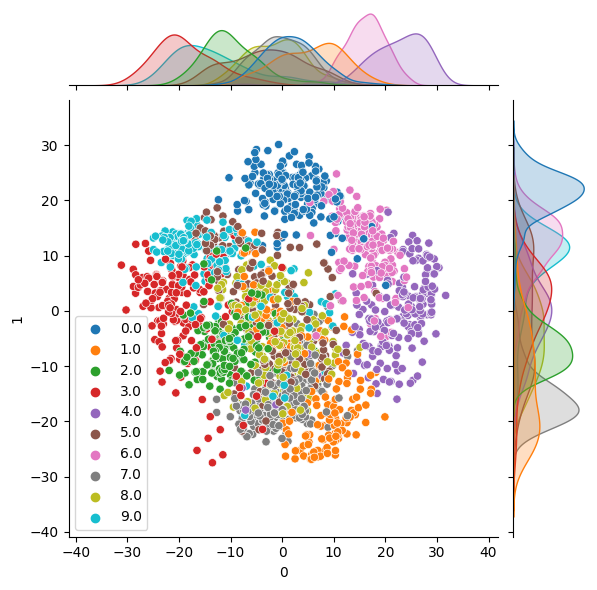

In [4]:
# pca = make_pipeline(StandardScaler(), PCA())
pca = PCA()
X_pca = pca.fit(X).transform(X)

# Plot the first 2 principal components
df = pd.DataFrame(data=np.c_[X_pca, y])
sns.jointplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1], hue=df.iloc[:,-1], palette = 'tab10')
plt.legend()
plt.show()

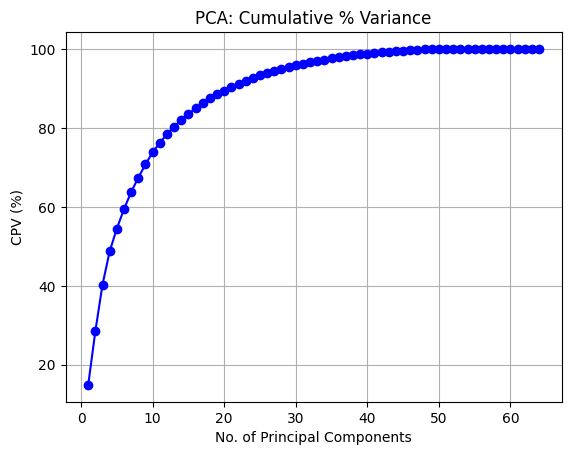

In [5]:
var = pca.explained_variance_ratio_
cpv = np.cumsum(var)*100
plt.plot(np.arange(cpv.size)+1,cpv,'bo-')
plt.title('PCA: Cumulative % Variance')
plt.xlabel('No. of Principal Components')
plt.ylabel('CPV (%)')
plt.grid()
plt.show()

In [6]:
print(f"CPV at 2 PCs: {cpv[1]}%")

CPV at 2 PCs: 28.50936482369926%


## Part II: PCA + SVM

In [7]:
# pca2 = make_pipeline(StandardScaler(), PCA(n_components=2))
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit(X).transform(X)

In [8]:
X_train_pca2, X_test_pca2, y_train_pca2, y_test_pca2 = train_test_split(X_pca2, y, test_size=0.3, random_state=0, stratify=y)

In [9]:
param_grid = {
    "svc__C": [0.01, 0.1, 1],
    "svc__kernel": ["linear", "poly", "rbf", "sigmoid"],
    "svc__gamma": ["scale", "auto", 0.01, 0.1, 1],
}
  
svc_pipeline = make_pipeline(StandardScaler(),
                             SVC()
                             )

grid_search = GridSearchCV(svc_pipeline, param_grid, n_jobs=-1)

start = time()
grid_search.fit(X_train_pca2, y_train_pca2)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_["params"])))

# Print best parameters after tuning
print(grid_search.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)


GridSearchCV took 2.67 seconds for 60 candidate parameter settings.
{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=1))])


In [10]:
# print classification report for train set
grid_predictions_train = grid_search.predict(X_train_pca2)
print(classification_report(y_train_pca2, grid_predictions_train))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       124
           1       0.74      0.54      0.63       127
           2       0.74      0.71      0.72       124
           3       0.85      0.70      0.77       128
           4       0.86      0.90      0.88       127
           5       0.33      0.15      0.21       127
           6       0.81      0.85      0.83       127
           7       0.66      0.81      0.73       125
           8       0.37      0.67      0.48       122
           9       0.67      0.65      0.66       126

    accuracy                           0.69      1257
   macro avg       0.70      0.69      0.68      1257
weighted avg       0.70      0.69      0.68      1257



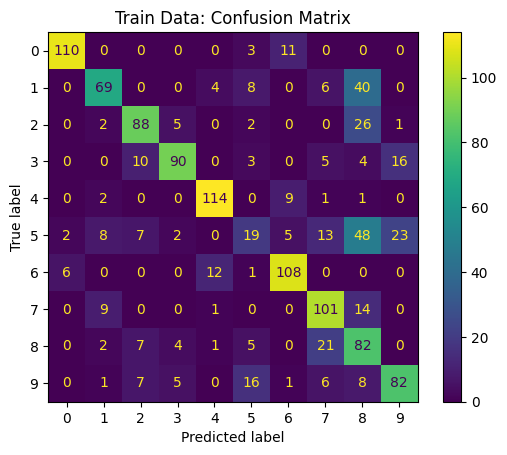

In [11]:
cfm = confusion_matrix(y_train_pca2, grid_predictions_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm)
cm_display.plot()
plt.title('Train Data: Confusion Matrix')
plt.show()

In [81]:
# print classification report
grid_predictions = grid_search.predict(X_test_pca2)
print(classification_report(y_test_pca2, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        54
           1       0.68      0.42      0.52        55
           2       0.71      0.66      0.69        53
           3       0.70      0.60      0.65        55
           4       0.88      0.81      0.85        54
           5       0.35      0.13      0.19        55
           6       0.80      0.89      0.84        54
           7       0.47      0.80      0.59        54
           8       0.32      0.50      0.39        52
           9       0.65      0.65      0.65        54

    accuracy                           0.64       540
   macro avg       0.65      0.64      0.63       540
weighted avg       0.65      0.64      0.63       540



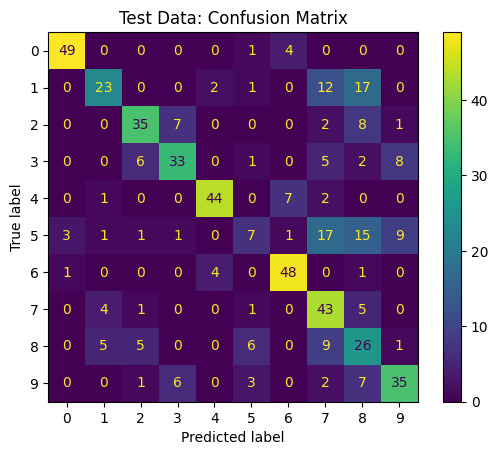

In [82]:
cfm = confusion_matrix(y_test_pca2, grid_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm)
cm_display.plot()
plt.title('Test Data: Confusion Matrix')
plt.show()

## Part III: LDA

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

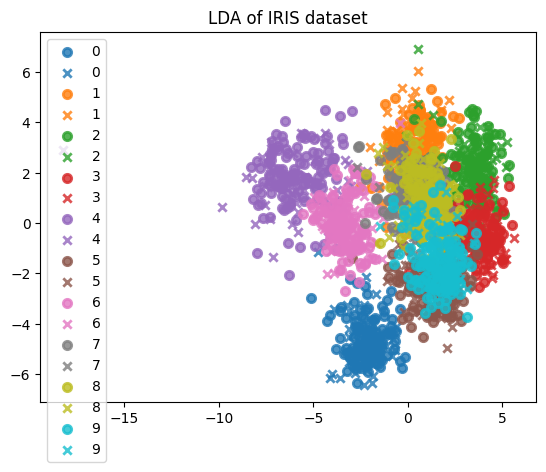

In [86]:
# LDA Results
colors = sns.color_palette('tab10')
target_names = list(set(y))
for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], 
                color=color, alpha=0.8, lw=2, label=target_name)
    plt.scatter(X_test_lda[y_test == i, 0], X_test_lda[y_test == i, 1], 
                color=color, alpha=0.8, lw=2, label=target_name, marker='x')
    
plt.legend(loc="best", shadow=False)
plt.title("LDA of IRIS dataset")
plt.show()

In [87]:
print(f"Training Accuracy: {lda.score(X_train,y_train)}")
print(f"Testing Accuracy: {lda.score(X_test,y_test)}")

print('Training: Confusion Matrix')
print(confusion_matrix(y_train, lda.predict(X_train)))
print('Testing: Confusion Matrix')
print(confusion_matrix(y_test, lda.predict(X_test)))

Training Accuracy: 0.9626093874303898
Testing Accuracy: 0.9592592592592593
Training: Confusion Matrix
[[123   0   0   0   0   0   1   0   0   0]
 [  0 121   0   0   0   0   0   0   3   3]
 [  0   2 122   0   0   0   0   0   0   0]
 [  0   0   1 120   0   2   0   0   4   1]
 [  0   0   0   0 124   0   0   1   1   1]
 [  0   0   0   1   0 121   1   0   0   4]
 [  0   0   0   0   0   0 126   0   0   1]
 [  0   0   0   0   0   0   0 122   0   3]
 [  0   4   0   0   0   1   0   1 113   3]
 [  0   1   0   2   0   1   0   1   3 118]]
Testing: Confusion Matrix
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  1  1]
 [ 0  0 51  2  0  0  0  0  0  0]
 [ 0  0  0 51  0  1  0  0  2  1]
 [ 0  2  0  0 51  0  0  0  1  0]
 [ 0  0  0  0  0 53  0  0  1  1]
 [ 0  2  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  4  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  1 51]]


LDA is the preferred approach for this problem because it achieved a higher test accuracy while requiring less effort. There is no need to tune the hyperparameters in the LDA anymore while we still needed to tune the hyperparameters in the SVM for the first approach.